In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/color-calibrated-fingernail/FingerNail_Features.xlsx
/kaggle/input/color-calibrated-fingernail/Fingernail Color Calibrated Masked/Fingernail Color Calibrated Masked/1709974143530.jpg
/kaggle/input/color-calibrated-fingernail/Fingernail Color Calibrated Masked/Fingernail Color Calibrated Masked/1710051134288.jpg
/kaggle/input/color-calibrated-fingernail/Fingernail Color Calibrated Masked/Fingernail Color Calibrated Masked/1709800917321.jpg
/kaggle/input/color-calibrated-fingernail/Fingernail Color Calibrated Masked/Fingernail Color Calibrated Masked/1709723206678.jpg
/kaggle/input/color-calibrated-fingernail/Fingernail Color Calibrated Masked/Fingernail Color Calibrated Masked/1709795312517.jpg
/kaggle/input/color-calibrated-fingernail/Fingernail Color Calibrated Masked/Fingernail Color Calibrated Masked/1709720647227.jpg
/kaggle/input/color-calibrated-fingernail/Fingernail Color Calibrated Masked/Fingernail Color Calibrated Masked/1710059890678.jpg
/kaggle/input/color-cal

In [2]:
import pandas as pd 
df = pd.read_excel('/kaggle/input/color-calibrated-fingernail/FingerNail_Features.xlsx')
df = df[['Image_Name','Hb Value']]
df.head()

,Image_Name,Hb Value
0,1709617374918.jpg,11.5
1,1709617703730.jpg,11.6
2,1709618658975.jpg,11.1
3,1709619498294.jpg,12.1
4,1709620017738.jpg,12.2


In [3]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.15, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.176, random_state=42)

In [4]:
print('train_df shape',train_df.shape)
print('test_df shape',test_df.shape)
print('tval_df shape',val_df.shape)

train_df shape (291, 2)
test_df shape (63, 2)
tval_df shape (63, 2)


In [5]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image

def load_image_and_label(image_file, label):
    image = tf.io.read_file(image_file)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])  # ResNet50 expects 224x224
    # Scale pixel values [0, 1] or standardize them
    image = image / 255.0
    return image, label

def create_tf_dataset(df, images_folder, batch_size=8, shuffle=True):
    # Construct full paths to images
    image_paths = [os.path.join(images_folder, img) for img in df['Image_Name'].values]
    labels = df['Hb Value'].values.astype(np.float32)

    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(load_image_and_label, num_parallel_calls=tf.data.AUTOTUNE)
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(df))
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

# Create datasets
train_ds = create_tf_dataset(train_df, "/kaggle/input/color-calibrated-fingernail/Fingernail Color Calibrated Masked/Fingernail Color Calibrated Masked", batch_size=16, shuffle=True)
val_ds   = create_tf_dataset(val_df,   "/kaggle/input/color-calibrated-fingernail/Fingernail Color Calibrated Masked/Fingernail Color Calibrated Masked", batch_size=16, shuffle=False)
test_ds  = create_tf_dataset(test_df,  "/kaggle/input/color-calibrated-fingernail/Fingernail Color Calibrated Masked/Fingernail Color Calibrated Masked", batch_size=16, shuffle=False)


2025-04-18 06:20:39.501476: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744957239.733533      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744957239.799999      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1744957252.128120      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [9]:
import os

def check_missing_images(df, images_folder):
    missing_files = []
    for fname in df['Image_Name'].values:
        path = os.path.join(images_folder, fname)
        if not os.path.exists(path):
            missing_files.append(fname)
    return missing_files

images_folder = "/kaggle/input/color-calibrated-fingernail/Fingernail Color Calibrated Masked/Fingernail Color Calibrated Masked"
missing_in_train = check_missing_images(train_df, images_folder)
missing_in_val = check_missing_images(val_df, images_folder)
missing_in_test = check_missing_images(test_df, images_folder)

print("Missing in train:", missing_in_train)
print("Missing in val:", missing_in_val)
print("Missing in test:", missing_in_test)


Missing in train: ['1709702130515.jpg', '1709981157896.jpg', '1709628983297.jpg', '1709891990196.jpg', '1709810080414.jpg', '1709985328537.jpg', '1710056521042.jpg', '1709617703730.jpg', '1709625695477.jpg', '1709876381184.jpg', '1709970198913.jpg', '1709712076996.jpg', '1709703297071.jpg', '1709891889667.jpg', '1710060011691.jpg', '1709636461126.jpg', '1709713864867.jpg', '1709642357991.jpg', '1709810659792.jpg', '1709704320678.jpg', '1709873373442.jpg', '1709965633520.jpg', '1709702159121.jpg', '1709878117750.jpg', '1709983832838.jpg', '1709968272857.jpg', '1709983297423.jpg', '1709806857417.jpg', '1709622450600.jpg', '1710062521836.jpg', '1709972673772.jpg', '1709639981572.jpg', '1709983853911.jpg', '1709976060129.jpg', '1709630816195.jpg', '1709971397481.jpg', '1709715881856.jpg', '1709986471453.jpg', '1709636926027.jpg', '1709628056279.jpg', '1709807229898.jpg', '1710050481240.jpg', '1709874528761.jpg', '1709973637588.jpg', '1710052147408.jpg', '1709966273098.jpg', '1709621398828.

In [10]:
train_df = train_df[~train_df['Image_Name'].isin(missing_in_train)]
val_df = val_df[~val_df['Image_Name'].isin(missing_in_val)]
test_df = test_df[~test_df['Image_Name'].isin(missing_in_test)]

In [11]:
train_ds = create_tf_dataset(train_df, images_folder, batch_size=16)
val_ds = create_tf_dataset(val_df, images_folder, batch_size=16, shuffle=False)
test_ds = create_tf_dataset(test_df, images_folder, batch_size=16, shuffle=False)

In [12]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def build_model(input_shape=(224, 224, 3)):
    # Load ResNet50 without the top classification layers
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)


    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    # Add your own fully connected layers if desired
    # x = Dense(128, activation='relu')(x)
    # x = Dropout(0.3)(x)

    # Final regression output (1 dimension: predicted Hb)
    predictions = Dense(1, activation='linear')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model


In [13]:
model = build_model(input_shape=(224, 224, 3))
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='mean_squared_error',  # or 'mae'
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)


In [14]:
epochs = 100
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/100


I0000 00:00:1744957608.958192      99 service.cc:148] XLA service 0x7bed000025d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744957608.959377      99 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1744957610.215354      99 cuda_dnn.cc:529] Loaded cuDNN version 90300


 7/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 127.7080 - mean_absolute_error: 11.1626

I0000 00:00:1744957613.134495      99 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 669ms/step - loss: 129.8970 - mean_absolute_error: 11.2588 - val_loss: 111.7742 - val_mean_absolute_error: 10.4465
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 124.7038 - mean_absolute_error: 11.0245 - val_loss: 105.1341 - val_mean_absolute_error: 10.1238
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 117.8691 - mean_absolute_error: 10.7197 - val_loss: 98.7064 - val_mean_absolute_error: 9.8012
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 111.3672 - mean_absolute_error: 10.3935 - val_loss: 92.5819 - val_mean_absolute_error: 9.4837
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 103.3851 - mean_absolute_error: 9.9959 - val_loss: 86.7998 - val_mean_absolute_error: 9.1738
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 95.9592 - mean_absolute_error: 9.6498 - val_loss: 81.2405 - val_mean_absolute_error: 8.8657
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 95.0797 - mean_absolute_e

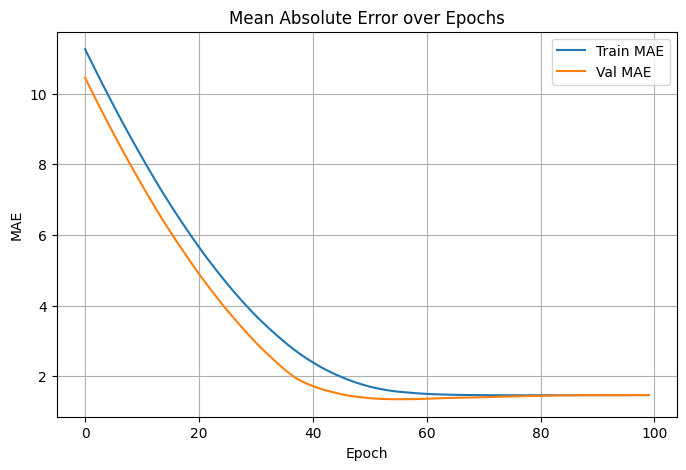

In [15]:
import matplotlib.pyplot as plt

# 1. Retrieve MAE values
train_mae = history.history['mean_absolute_error']       # Training MAE per epoch
val_mae   = history.history['val_mean_absolute_error']   # Validation MAE per epoch

# 2. Plot
plt.figure(figsize=(8, 5))
plt.plot(train_mae, label='Train MAE')
plt.plot(val_mae, label='Val MAE')
plt.title('Mean Absolute Error over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
model.save('resnet-50-Trainable_False_ColorCalibratedFingerNail.h5')

In [17]:
test_loss, test_mae = model.evaluate(test_ds)
print("Test MAE:", test_mae)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - loss: 3.7066 - mean_absolute_error: 1.6378
Test MAE: 1.559491753578186


In [18]:
def build_model(input_shape=(224, 224, 3)):
    # Load ResNet50 without the top classification layers
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)


    for layer in base_model.layers:
        layer.trainable = True

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    # Add your own fully connected layers if desired
    # x = Dense(128, activation='relu')(x)
    # x = Dropout(0.3)(x)

    # Final regression output (1 dimension: predicted Hb)
    predictions = Dense(1, activation='linear')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model


In [19]:
model = build_model(input_shape=(224, 224, 3))
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='mean_squared_error',  # or 'mae'
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)


In [20]:
epochs = 100
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - loss: 82.1075 - mean_absolute_error: 8.0100 - val_loss: 76.9679 - val_mean_absolute_error: 8.6205
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 9.1453 - mean_absolute_error: 2.4205 - val_loss: 95.8483 - val_mean_absolute_error: 9.6539
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 3.5015 - mean_absolute_error: 1.4578 - val_loss: 97.4113 - val_mean_absolute_error: 9.7349
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 2.1728 - mean_absolute_error: 1.1555 - val_loss: 89.7458 - val_mean_absolute_error: 9.3327
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 1.5972 - mean_absolute_error: 0.9936 - val_loss: 81.2386 - val_mean_absolute_error: 8.8653
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 1.2830 - mean_absolute_error: 0.9249 - val_loss: 71.3902 - val_mean_absolute_error: 8.2915
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.9404 - mean_absolute_error: 0

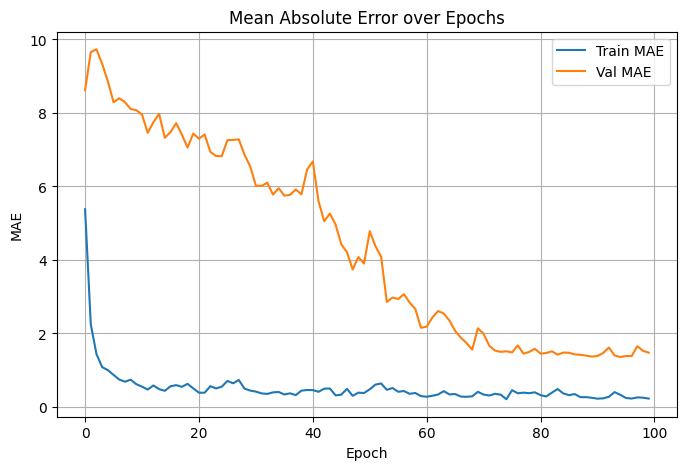

In [21]:

# 1. Retrieve MAE values
train_mae = history.history['mean_absolute_error']       # Training MAE per epoch
val_mae   = history.history['val_mean_absolute_error']   # Validation MAE per epoch

# 2. Plot
plt.figure(figsize=(8, 5))
plt.plot(train_mae, label='Train MAE')
plt.plot(val_mae, label='Val MAE')
plt.title('Mean Absolute Error over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
test_loss, test_mae = model.evaluate(test_ds)
print("Test MAE:", test_mae)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 764ms/step - loss: 3.6839 - mean_absolute_error: 1.5874
Test MAE: 1.5559710264205933


In [23]:
from tensorflow.keras.layers import Dropout
def build_model(input_shape=(224, 224, 3)):
    # Load ResNet50 without the top classification layers
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)


    for layer in base_model.layers:
        layer.trainable = True

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    # Add your own fully connected layers if desired
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)

    # Final regression output (1 dimension: predicted Hb)
    predictions = Dense(1, activation='linear')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model


In [24]:
model = build_model(input_shape=(224, 224, 3))
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='mean_squared_error',  # or 'mae'
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)


In [25]:
epochs = 100
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - loss: 53.4997 - mean_absolute_error: 6.2562 - val_loss: 67.6851 - val_mean_absolute_error: 8.0648
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 10.6060 - mean_absolute_error: 2.5997 - val_loss: 50.3710 - val_mean_absolute_error: 6.9075
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 5.6453 - mean_absolute_error: 1.9022 - val_loss: 35.9650 - val_mean_absolute_error: 5.7728
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 4.7424 - mean_absolute_error: 1.7041 - val_loss: 17.9413 - val_mean_absolute_error: 3.9120
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 4.3526 - mean_absolute_error: 1.6708 - val_loss: 14.7940 - val_mean_absolute_error: 3.4860
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 3.9772 - mean_absolute_error: 1.5869 - val_loss: 13.3838 - val_mean_absolute_error: 3.2772
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 3.9202 - mean_absolute_error:

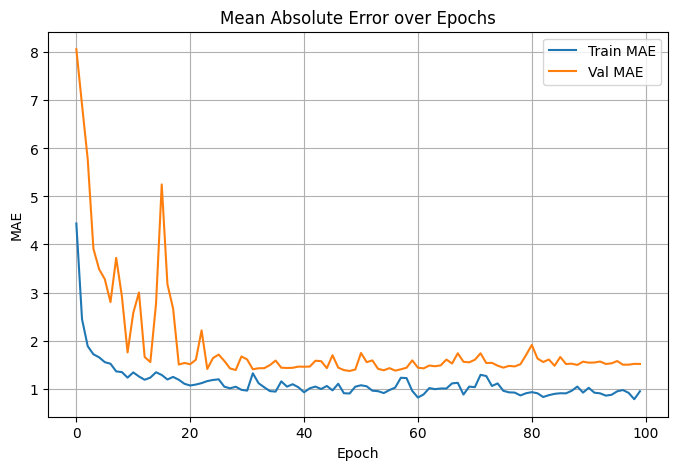

In [26]:
import matplotlib.pyplot as plt

# 1. Retrieve MAE values
train_mae = history.history['mean_absolute_error']       # Training MAE per epoch
val_mae   = history.history['val_mean_absolute_error']   # Validation MAE per epoch

# 2. Plot
plt.figure(figsize=(8, 5))
plt.plot(train_mae, label='Train MAE')
plt.plot(val_mae, label='Val MAE')
plt.title('Mean Absolute Error over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
test_loss, test_mae = model.evaluate(test_ds)
print("Test MAE:", test_mae)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 759ms/step - loss: 4.9223 - mean_absolute_error: 1.7456
Test MAE: 1.650014877319336
